# Importing the Libraries

In [4]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!{sys.executable} -m pip install openpyxl

                                              0.0/250.0 kB ? eta -:--:--
     -------------------------------------  245.8/250.0 kB 5.1 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 5.2 MB/s eta 0:00:00
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


# Reading the data.

## The data is in excel format - openpyxl dependency is needed to read xlsx files

In [6]:
train_data=pd.read_excel(r'D:\Datasets\Flight Prediction\Data_Train.xlsx')

In [7]:
train_data.head(7)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## Looks like there is 1 NULL value in 2 columns

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


### The null value in 2 columns belong to same row. This row can thus be dropped

In [11]:
train_data.dropna(inplace=True)

In [12]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Looks good

## There are date columns like (Date_of_Journey) in the data. Let us pre-process those columns

In [13]:
data=train_data.copy()

In [14]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [15]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## Date_of_Journey is an object value. Better to convert it into TimeStamp datatype

In [16]:
def change_into_datetime(col):
    data[col]=pd.to_datetime(data[col])

In [17]:
for feature in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(feature)

C:\Users\ssaia\AppData\Local\Temp\ipykernel_12252\1802885727.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col]=pd.to_datetime(data[col])
C:\Users\ssaia\AppData\Local\Temp\ipykernel_12252\1802885727.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col]=pd.to_datetime(data[col])
C:\Users\ssaia\AppData\Local\Temp\ipykernel_12252\1802885727.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col]=pd.to_datetime(data[col])


In [18]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

## Extract day, month, year from the columns

In [19]:
data['journey_day']=data['Date_of_Journey'].dt.day

In [20]:
data['journey_month']=data['Date_of_Journey'].dt.month

In [21]:
data['journey_year']=data['Date_of_Journey'].dt.year

### Dropping Date_of_Journey

In [22]:
data.drop('Date_of_Journey',axis=1,inplace=True)

In [23]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-06-08 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-08 05:50:00,2023-06-08 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


## we have to do this multiple times. Lets make a function

In [24]:
def extract_hour_min(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head(2)

In [25]:
extract_hour_min(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-08 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50


In [26]:
extract_hour_min(data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


## Lets take a look at Duration feature

In [27]:
data['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

### This type cannot be fed into ML model. Lets featurize it

### First, some data has only hours and some has only minutes. Lets fill them with 0h or 0m

In [28]:
def preprocess_duration(x):
    if 'h' not in x:
        x='0h '+x
    elif 'm' not in x:
        x=x+' 0m'
    return x

In [29]:
data['Duration']=data['Duration'].apply(preprocess_duration)

In [30]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

### Looks good

## Splitting the hours and minutes into different columns

In [31]:
data['Duration_hours']=data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [32]:
data['Duration_mins']=data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [33]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0


# Data Analysis

## Does Duration impact price?

### Converting the duration hours and minutes into total minutes by using hours* 2 + minutes * 1

In [34]:
data['Duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [35]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445


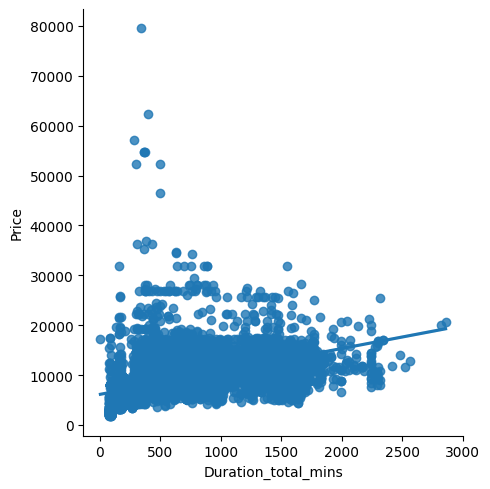

In [36]:
sns.lmplot(x='Duration_total_mins',y='Price',data=data)

### Observation - looks like there is a slight increase in price with increase in duration. This might have something to do with stops?

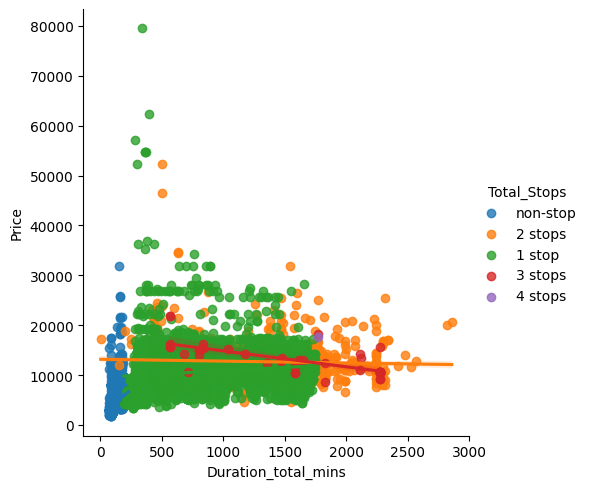

In [38]:
sns.lmplot(x='Duration_total_mins',y='Price', hue ='Total_Stops',data=data)

## Airline vs Price

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers'),
  Text(3, 0, 'Air India'),
  Text(4, 0, 'SpiceJet'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'IndiGo'),
  Text(7, 0, 'Vistara'),
  Text(8, 0, 'Multiple carriers Premium economy'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'Vistara Premium economy'),
  Text(11, 0, 'Trujet')])

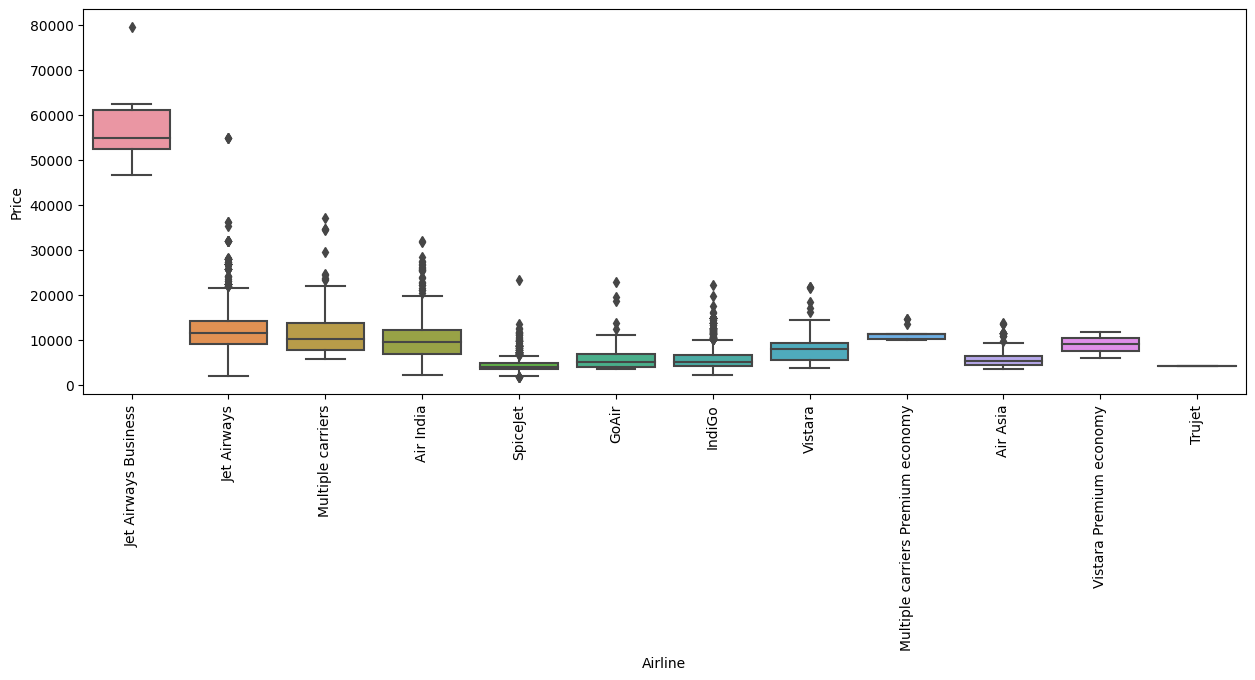

In [40]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=data.sort_values('Price',ascending = False))
plt.xticks(rotation='vertical')

### Obeservation - Jet Airways Business is way expensive compared to other

# Encoding

In [41]:
data.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25,325


## Mean encoding additional_Info column

In [42]:
np.round(data['Additional_Info'].value_counts()/len(data)*100,2)

Additional_Info
No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: count, dtype: float64

## Looks like the values in this column is 80% No info. Hence, this cannot be used - Drop this column

### Route also cannot be used. Duration has already been preprocessed - dropping these 2

In [43]:
data.drop(columns=['Additional_Info','Route','Duration_total_mins','journey_year'],axis=1,inplace=True)

In [44]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'journey_day', 'journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

In [45]:
data.head(4)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30,5,25


# Separate Categorical & Numerical data

In [46]:
cat_col=[col for col in data.columns if data[col].dtype=='object']

In [47]:
num_col=[col for col in data.columns if data[col].dtype!='object']

## Handling cat_col using One Hot Encoding & label Encoding

In [48]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [49]:
for category in data['Source'].unique():
    data['Source_'+category]=data['Source'].apply(lambda x: 1 if x==category else 0)

In [50]:
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [51]:
data.head(5)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30,5,25,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35,4,45,1,0,0,0,0


## Performing Target Guided Encoding. One Hot Encoding can cause curse of dimensionality

In [52]:
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [53]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [54]:
dict1={key:index for index,key in enumerate(airlines,0)}

In [55]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [56]:
data['Airline']=data['Airline'].map(dict1)

In [57]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [58]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

## Delhi & New Delhi are the same.

In [59]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [60]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [61]:
dest=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [62]:
dict2={key:index for index,key in enumerate(dest,0)}

In [63]:
data['Destination']=data['Destination'].map(dict2)

In [64]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

## Manual encoding on Total_stops feature

In [65]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [66]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [67]:
data['Total_Stops']=data['Total_Stops'].map(stops)

In [68]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [69]:
data['Price']=np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

In [70]:
data.drop(columns=['Source','Duration'],axis=1,inplace=True)

In [71]:
data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_day              int32
journey_month            int32
Dep_Time_hour            int32
Dep_Time_minute          int32
Arrival_Time_hour        int32
Arrival_Time_minute      int32
Duration_hours           int64
Duration_mins            int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

# Feature Selection

In [74]:
!{sys.executable} -m pip install scikit-learn
from sklearn.feature_selection import mutual_info_regression

  Using cached scikit_learn-1.2.2-cp38-cp38-win_amd64.whl (8.3 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [75]:
X=data.drop(['Price'],axis=1)

In [76]:
y=data['Price']

In [77]:
mutual_info_regression(X,y)

array([0.97681465, 1.00754096, 0.78414767, 0.23492183, 0.62729498,
       0.33795253, 0.25714312, 0.3970279 , 0.36041672, 0.46587321,
       0.34487313, 0.38203447, 0.46501014, 0.52134665, 0.14124732,
       0.19941827])

In [78]:
imp=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp.columns=['importance']

In [79]:
imp.sort_values(by='importance',ascending=False)

,importance
Destination,0.998389
Airline,0.979211
Total_Stops,0.788221
journey_month,0.624085
Source_Delhi,0.526957
Duration_hours,0.476790
Source_Kolkata,0.459749
Arrival_Time_hour,0.395324
Source_Banglore,0.383110
Arrival_Time_minute,0.356609


## Looks like we can use all the columns

# Model Building

### Split data into train & test data

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Using Random Forest Regression

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
ml_model=RandomForestRegressor()

In [84]:
model=ml_model.fit(X_train,y_train)

In [85]:
y_pred=model.predict(X_test)

In [86]:
model.score(X_train,y_train)

0.9511438064858545

r2_score: 0.807698071317222
MSE :  3743656.9624864184
MAE :  1183.428113962351
RMSE :  1934.853214713307


C:\Users\ssaia\AppData\Local\Temp\ipykernel_12252\2906942107.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_prediction)


<Axes: xlabel='Price', ylabel='Density'>

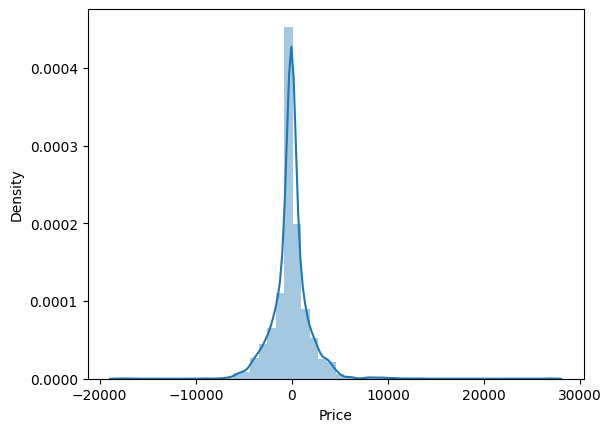

In [89]:
from sklearn import metrics
y_prediction=model.predict(X_test)
r2_score=metrics.r2_score(y_test,y_prediction)
print('r2_score: {}'.format(r2_score))
print('MSE : ', metrics.mean_squared_error(y_test,y_prediction))
print('MAE : ', metrics.mean_absolute_error(y_test,y_prediction))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
sns.distplot(y_test-y_prediction)

# END